In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import matplotlib.dates as mdates

# MIXED


In [3]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_MIXED_fullData_good")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #User trips
    user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]
    user_df= pd.concat([pd.read_csv(f) for f in user_filenames])

    #Food rips
    food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    food_df= pd.concat([pd.read_csv(f) for f in food_filenames])

    #Bike venets
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df= pd.concat([pd.read_csv(f) for f in bike_filenames ])


EmptyDataError: No columns to parse from file

In [135]:
user_df.columns

Index(['Cycle', 'Day', 'Time', 'NumBikes', 'Battery', 'AutDrivingSpeed',
       'MaxBiddingTime', 'UrgencyPerson', 'UrgencyPackage', 'UrgencyWeight',
       'WaitWeight', 'ProximityWeight', 'Agent', 'Trip Served',
       'Wait Time (min)', 'Departure Time', 'Arrival Time', 'Duration (min)',
       'Origin [lat]', 'Origin [lon]', 'Destination [lat]',
       'Destination [lon]', 'Distance (m)'],
      dtype='object')

In [25]:
user_df['Wait Time (min)'].describe()


count    536108.000000
mean          3.884042
std           2.790674
min           0.250000
25%           1.833333
50%           3.250000
75%           5.333333
max          35.083333
Name: Wait Time (min), dtype: float64

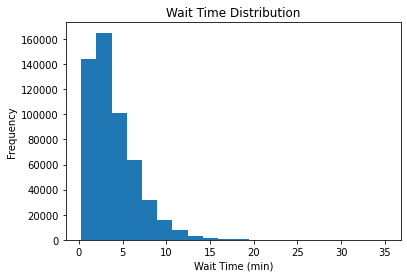

In [23]:

user_df['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [24]:
food_df.columns

Index(['Cycle', 'Day', 'Time', 'NumBikes', 'Battery', 'AutDrivingSpeed',
       'MaxBiddingTime', 'UrgencyPerson', 'UrgencyPackage', 'UrgencyWeight',
       'WaitWeight', 'ProximityWeight', 'Agent', 'Trip Served',
       'Wait Time (min)', 'Departure Time', 'Arrival Time', 'Duration (min)',
       'Origin [lat]', 'Origin [lon]', 'Destination [lat]',
       'Destination [lon]', 'Distance (m)'],
      dtype='object')

In [26]:
food_df['Wait Time (min)'].describe()


count    1.143002e+06
mean     4.396642e+00
std      3.138037e+00
min      2.500000e-01
25%      2.083333e+00
50%      3.583333e+00
75%      6.083333e+00
max      3.558333e+01
Name: Wait Time (min), dtype: float64

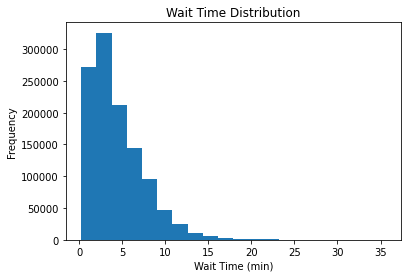

In [27]:

food_df['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [28]:
bike_df.columns

Index(['Cycle', 'Day', 'Time', 'NumBikes', 'Battery', 'AutDrivingSpeed',
       'MaxBiddingTime', 'UrgencyPerson', 'UrgencyPackage', 'UrgencyWeight',
       'WaitWeight', 'ProximityWeight', 'Agent', 'Event', 'Activity',
       'Message', 'Start Time', 'End Time', 'Duration (min)',
       'Distance Traveled', 'Start Battery %', 'End Battery %',
       'Battery Gain %'],
      dtype='object')

In [29]:
bike_df.head()

,Cycle,Day,Time,NumBikes,Battery,AutDrivingSpeed,MaxBiddingTime,UrgencyPerson,UrgencyPackage,UrgencyWeight,...,Event,Activity,Message,Start Time,End Time,Duration (min),Distance Traveled,Start Battery %,End Battery %,Battery Gain %
0,0,7,00:00:00,337,70000.0,8.0,0,1,0,0.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,7,00:00:00,337,70000.0,8.0,0,1,0,0.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7,00:00:00,337,70000.0,8.0,0,1,0,0.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7,00:00:00,337,70000.0,8.0,0,1,0,0.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7,00:00:00,337,70000.0,8.0,0,1,0,0.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
bike_df.groupby('Event')['Distance Traveled'].describe()


,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: in_use_packages,1143002.0,1374.696503,1117.804817,0.0,549.301042,1085.045653,1861.786021,6810.574838
END: in_use_people,536108.0,1623.220892,927.737388,0.0,998.954311,1436.242754,2018.945457,7619.097243
END: low_battery,75658.0,231.146799,159.708177,0.0,122.920747,209.397031,313.324245,1585.590035
END: picking_up_packages,1143002.0,525.094362,420.153616,0.0,215.788024,426.868763,752.616926,4539.871808
END: picking_up_people,536369.0,452.893271,380.868239,0.0,179.446407,371.540978,633.849274,4091.350810
END: rebalancing,141758.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
END: wandering,1887495.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
START: in_use_packages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: in_use_people,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df)



                         Event  Distance Percentage
0         END: in_use_packages            47.584399
1           END: in_use_people            26.353644
2             END: low_battery             0.529607
3     END: picking_up_packages            18.175866
4       END: picking_up_people             7.356484
5             END: rebalancing             0.000000
6               END: wandering             0.000000
7       START: in_use_packages             0.000000
8         START: in_use_people             0.000000
9           START: low_battery             0.000000
10  START: picking_up_packages             0.000000
11    START: picking_up_people             0.000000
12          START: rebalancing             0.000000
13            START: wandering             0.000000


In [83]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df)

                         Event  Time Percentage
0         END: in_use_packages         9.537661
1           END: in_use_people         4.136777
2             END: low_battery         0.120907
3     END: picking_up_packages         3.760386
4       END: picking_up_people         1.546495
5             END: rebalancing         0.687201
6               END: wandering        80.210573
7       START: in_use_packages         0.000000
8         START: in_use_people         0.000000
9           START: low_battery         0.000000
10  START: picking_up_packages         0.000000
11    START: picking_up_people         0.000000
12          START: rebalancing         0.000000
13            START: wandering         0.000000


# USERS

In [36]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_USER_Fulldata")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #User trips
    user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]
    user_df_u= pd.concat([pd.read_csv(f) for f in user_filenames])

    #Bike events
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df_u= pd.concat([pd.read_csv(f) for f in bike_filenames ])

In [37]:
user_df_u['Wait Time (min)'].describe()

count    536035.000000
mean          3.682755
std           2.858921
min           0.250000
25%           1.583333
50%           2.916667
75%           5.083333
max          31.250000
Name: Wait Time (min), dtype: float64

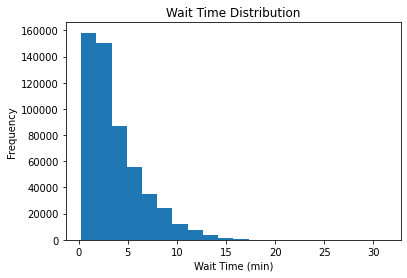

In [38]:

user_df_u['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [39]:
bike_df_u.groupby('Event')['Distance Traveled'].describe()


,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: in_use_people,536045.0,1623.166284,927.759309,0.0,998.954311,1436.235169,2018.945457,7619.097243
END: low_battery,25435.0,217.456663,153.059623,0.0,113.667018,202.014551,296.185058,1585.590035
END: picking_up_people,536373.0,423.996287,391.408018,0.0,134.943717,327.117785,601.432642,3611.879962
END: wandering,561846.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
START: in_use_people,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: low_battery,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: picking_up_people,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: wandering,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df_u.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df_u = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df_u)

                      Event  Distance Percentage
0        END: in_use_people            78.881012
1          END: low_battery             0.501433
2    END: picking_up_people            20.617555
3            END: wandering             0.000000
4      START: in_use_people             0.000000
5        START: low_battery             0.000000
6  START: picking_up_people             0.000000
7          START: wandering             0.000000


In [84]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df_u.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df_u = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df_u)

                      Event  Time Percentage
0        END: in_use_people         7.782789
1          END: low_battery         0.070518
2    END: picking_up_people         2.749113
3            END: wandering        89.397580
4      START: in_use_people         0.000000
5        START: low_battery         0.000000
6  START: picking_up_people         0.000000
7          START: wandering         0.000000


# FOOD

In [136]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_FOOD_FullData_good")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #Food rips
    food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    food_df_f= pd.concat([pd.read_csv(f) for f in food_filenames])

    #Bike venets
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df_f= pd.concat([pd.read_csv(f) for f in bike_filenames ])

In [137]:
food_df_f['Wait Time (min)'].describe()

count    96273.000000
mean         5.871523
std          5.444190
min          0.000000
25%          2.583333
50%          4.750000
75%          7.583333
max         57.833333
Name: Wait Time (min), dtype: float64

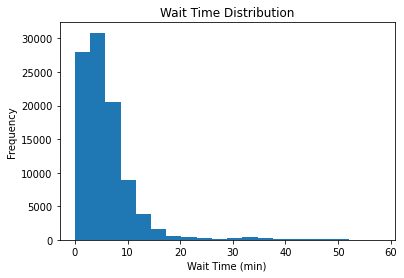

In [138]:

food_df_f['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [139]:
bike_df_f.groupby('Event')['Distance Traveled'].describe()

,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: in_use_packages,95842.0,1430.639109,1125.832204,0.0,608.180070,1144.326138,1922.656102,6789.502770
END: low_battery,4741.0,247.045579,164.266763,0.0,138.544948,221.163044,334.694987,891.131296
END: picking_up_packages,95842.0,724.445065,724.902870,0.0,289.723703,570.223466,938.230698,7702.095918
END: wandering,100583.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
START: in_use_packages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: low_battery,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: picking_up_packages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: wandering,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df_f.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df_f = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df_f)

                        Event  Distance Percentage
0        END: in_use_packages            66.010058
1            END: low_battery             0.563860
2    END: picking_up_packages            33.426082
3              END: wandering             0.000000
4      START: in_use_packages             0.000000
5          START: low_battery             0.000000
6  START: picking_up_packages             0.000000
7            START: wandering             0.000000


In [141]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df_f.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df_f = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df_f)

                        Event  Time Percentage
0        END: in_use_packages         2.275116
1            END: low_battery         0.021938
2    END: picking_up_packages         1.174591
3              END: wandering        96.528355
4      START: in_use_packages         0.000000
5          START: low_battery         0.000000
6  START: picking_up_packages         0.000000
7            START: wandering         0.000000


 # BIDDING


In [49]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_BIDDING_FullData_good")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #User trips
    user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]
    user_df_b= pd.concat([pd.read_csv(f) for f in user_filenames])

    #Food rips
    food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    food_df_b= pd.concat([pd.read_csv(f) for f in food_filenames])

    #Bike venets
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df_b= pd.concat([pd.read_csv(f) for f in bike_filenames ])

In [50]:
user_df_b['Wait Time (min)'].describe()

count    536040.000000
mean          3.799844
std           2.809417
min           0.250000
25%           1.750000
50%           3.166667
75%           5.250000
max          34.916667
Name: Wait Time (min), dtype: float64

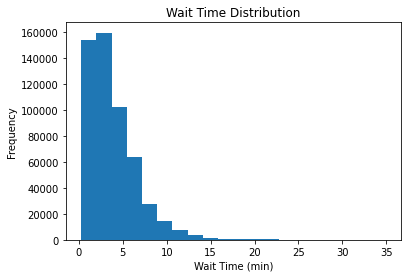

In [51]:

user_df_b['Wait Time (min)'].plot.hist(bins=20)  
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [52]:
food_df_b['Wait Time (min)'].describe()

count    1.143002e+06
mean     3.980554e+00
std      2.902269e+00
min      2.500000e-01
25%      1.833333e+00
50%      3.250000e+00
75%      5.500000e+00
max      3.066667e+01
Name: Wait Time (min), dtype: float64

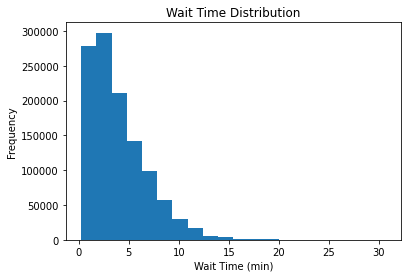

In [53]:

food_df_b['Wait Time (min)'].plot.hist(bins=20) 
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [54]:
bike_df_b.groupby('Event')['Distance Traveled'].describe()

,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: bidding,1679370.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
END: endBid,1679370.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
END: in_use_packages,1143002.0,1374.699009,1117.808100,0.0,549.301042,1085.045653,1861.786021,6810.574838
END: in_use_people,536045.0,1623.221124,927.779794,0.0,998.954311,1436.235169,2018.945457,7619.097243
END: low_battery,75141.0,233.803525,162.190281,0.0,122.920747,212.848961,315.638529,1585.590035
END: picking_up_packages,1143002.0,490.198171,391.030466,0.0,208.835691,398.231492,700.555495,4038.164416
END: picking_up_people,536292.0,461.946724,384.896198,0.0,190.609045,383.978565,648.174186,4091.350810
END: rebalancing,141856.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
END: wandering,1884887.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [55]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df_b.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df_b = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df_b)

                         Event  Distance Percentage
0                 END: bidding             0.000000
1                  END: endBid             0.000000
2         END: in_use_packages            48.095506
3           END: in_use_people            26.633536
4             END: low_battery             0.537747
5     END: picking_up_packages            17.150175
6       END: picking_up_people             7.583036
7             END: rebalancing             0.000000
8               END: wandering             0.000000
9               START: bidding             0.000000
10               START: endBid             0.000000
11      START: in_use_packages             0.000000
12        START: in_use_people             0.000000
13          START: low_battery             0.000000
14  START: picking_up_packages             0.000000
15    START: picking_up_people             0.000000
16          START: rebalancing             0.000000
17            START: wandering             0.000000


In [86]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df_b.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df_b = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df_b)

                         Event  Time Percentage
0                 END: bidding         0.970128
1                  END: endBid         0.000000
2         END: in_use_packages         9.561231
3           END: in_use_people         4.146487
4             END: low_battery         0.121688
5     END: picking_up_packages         3.542940
6       END: picking_up_people         1.585326
7             END: rebalancing         0.713743
8               END: wandering        79.358455
9               START: bidding         0.000000
10               START: endBid         0.000000
11      START: in_use_packages         0.000000
12        START: in_use_people         0.000000
13          START: low_battery         0.000000
14  START: picking_up_packages         0.000000
15    START: picking_up_people         0.000000
16          START: rebalancing         0.000000
17            START: wandering         0.000000


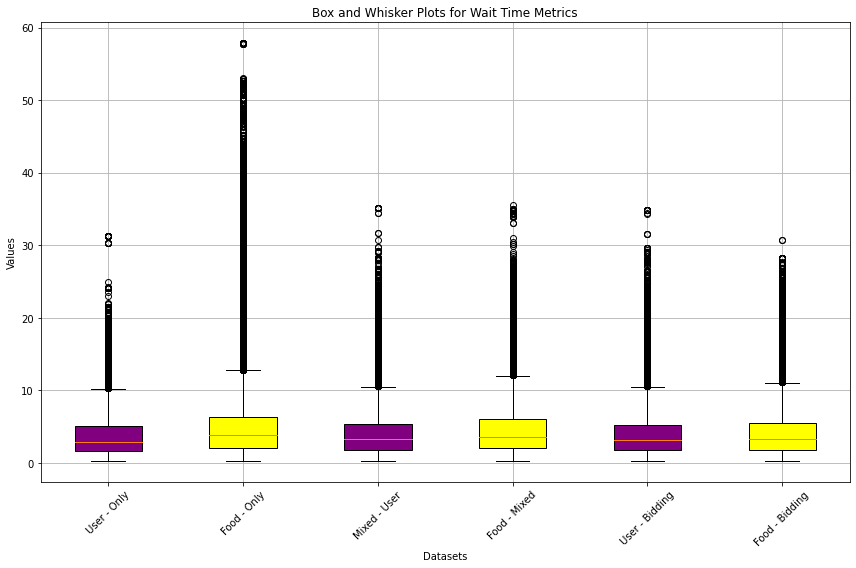

In [68]:

# Set the columns you want to include in the plot
columns_to_plot = ['Wait Time (min)']

# Create a list of flattened data for each dataset
data_frames = [ user_df_u,food_df_f, user_df, food_df,  user_df_b, food_df_b]
labels = ['User - Only', 'Food - Only', 'Mixed - User', 'Food - Mixed', 'User - Bidding', 'Food - Bidding']

data = [df[columns_to_plot].values.flatten() for df in data_frames]

# Create a box and whisker plot for the combined data
plt.figure(figsize=(12, 8))

# Plot multiple boxes in one plot with custom colors
bp = plt.boxplot(data, labels=labels, patch_artist=True)

# Assign different colors to the boxes
colors = ['purple', 'yellow', 'purple', 'yellow', 'purple', 'yellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels and title
plt.xlabel('Datasets')
plt.ylabel('Values')
plt.title('Box and Whisker Plots for Wait Time Metrics')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [124]:
# Define a mapping of old column names to new column names
column_mapping = {
   'END: bidding' : 'Bidding',
    'END: in_use_packages' : 'In use package',
    'END: in_use_people': 'In use rider',
    'END: low_battery': 'Recharge',
    'END: picking_up_packages' : 'Package pickup',
    'END: picking_up_people': 'Rider pickup',
    'END: rebalancing' : 'Rebalancing',
    'END: wandering': 'Idling'
}

# Create a new DataFrame with the renamed columns
time_b = percentage_time_df_b.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time_b['New Column Name'] = time_b['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time_b)

  New Column Name  Time Percentage
0         Bidding         0.970128
2  In use package         9.561231
3    In use rider         4.146487
4        Recharge         0.121688
5  Package pickup         3.542940
6    Rider pickup         1.585326
7     Rebalancing         0.713743
8          Idling        79.358455


In [125]:
# Create a new DataFrame with the renamed columns
time = percentage_time_df.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time['New Column Name'] = time['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time)



  New Column Name  Time Percentage
0  In use package         9.537661
1    In use rider         4.136777
2        Recharge         0.120907
3  Package pickup         3.760386
4    Rider pickup         1.546495
5     Rebalancing         0.687201
6          Idling        80.210573


In [118]:
# Create a new DataFrame with the renamed columns
time_u = percentage_time_df_u.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time_u['New Column Name'] = time_u['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time_u)

  New Column Name  Time Percentage
0    In use rider         7.782789
1        Recharge         0.070518
2    Rider pickup         2.749113
3          Idling        89.397580


In [119]:
# Create a new DataFrame with the renamed columns
time_f = percentage_time_df_f.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time_f['New Column Name'] = time_f['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time_f)

  New Column Name  Time Percentage
0  In use package        12.960412
1        Recharge         0.118316
2  Package pickup         5.392217
3     Rebalancing         0.979761
4          Idling        80.549295


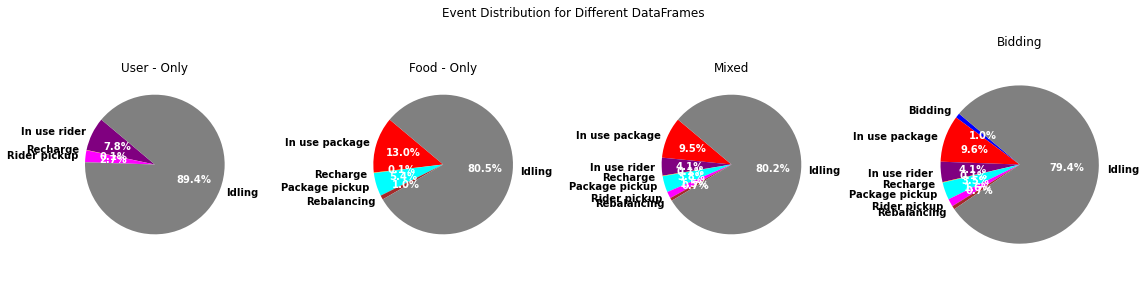

In [128]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a list of DataFrames
data_frames = [time_u, time_f, time, time_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Define a color map to ensure consistent colors for the same row names
color_map = {
    'Bidding': 'blue',
    'In use package': 'red',
    'In use rider': 'purple',
    'Recharge': 'orange',
    'Package pickup': 'cyan',
    'Rider pickup': 'magenta',
    'Rebalancing': 'brown',
    'Idling': 'gray',
}

# Create subplots for pie charts
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor='white')  # Set facecolor to white

for i, ax in enumerate(axes):
    df = data_frames[i]

    # Filter out rows with Percentage > 0 (optional, to exclude zero percentage values)
    df = df[df['Time Percentage'] > 0]

    # Get unique row names and corresponding colors
    unique_rows = df['New Column Name'].unique()
    colors = [color_map.get(row, 'gray') for row in unique_rows]

    # Create the pie chart with improved settings
    wedges, texts, autotexts = ax.pie(
        df['Time Percentage'],
        labels=df['New Column Name'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,  # Use the assigned colors from the color map
    )

    # Adjust text properties for better readability
    for text, autotext in zip(texts, autotexts):
        text.set(size=10, weight='bold', color='black')
        autotext.set(size=10, weight='bold', color='white')

    # Add a title for each subplot
    ax.set_title(titles[i])

# Add a common title for all subplots
fig.suptitle('Event Distribution for Different DataFrames')

# Display the subplots
plt.axis('equal')  # Equal aspect ratio ensures that the pie charts are circular.
plt.tight_layout()
plt.show()


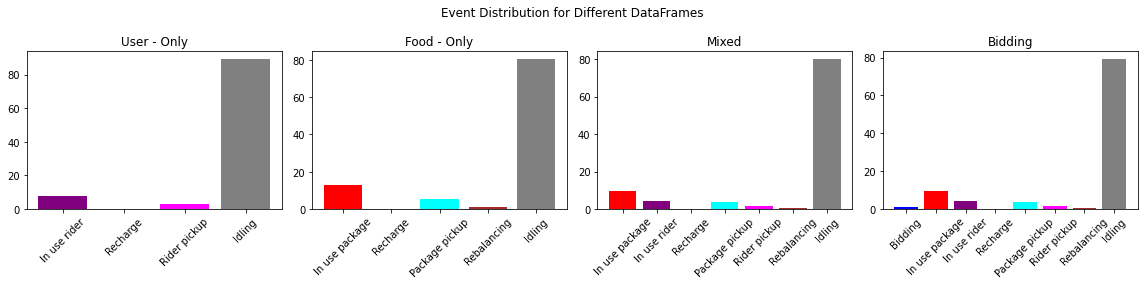

In [129]:

# Create a list of DataFrames
data_frames = [time_u, time_f, time, time_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Define a color map to ensure consistent colors for the same row names
color_map = {
    'Bidding': 'blue',
    'In use package': 'red',
    'In use rider': 'purple',
    'Recharge': 'orange',
    'Package pickup': 'cyan',
    'Rider pickup': 'magenta',
    'Rebalancing': 'brown',
    'Idling': 'gray',
}

# Create subplots for bar charts
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor='white')  # Set facecolor to white

for i, ax in enumerate(axes):
    df = data_frames[i]

    # Filter out rows with Percentage > 0 (optional, to exclude zero percentage values)
    df = df[df['Time Percentage'] > 0]

    # Get unique row names and corresponding colors
    unique_rows = df['New Column Name']
    values = df['Time Percentage']
    colors = [color_map.get(row, 'gray') for row in unique_rows]

    # Create the bar chart with improved settings
    ax.bar(unique_rows, values, color=colors)

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

    # Add a title for each subplot
    ax.set_title(titles[i])

# Add a common title for all subplots
fig.suptitle('Event Distribution for Different DataFrames')

# Display the subplots
plt.tight_layout()
plt.show()


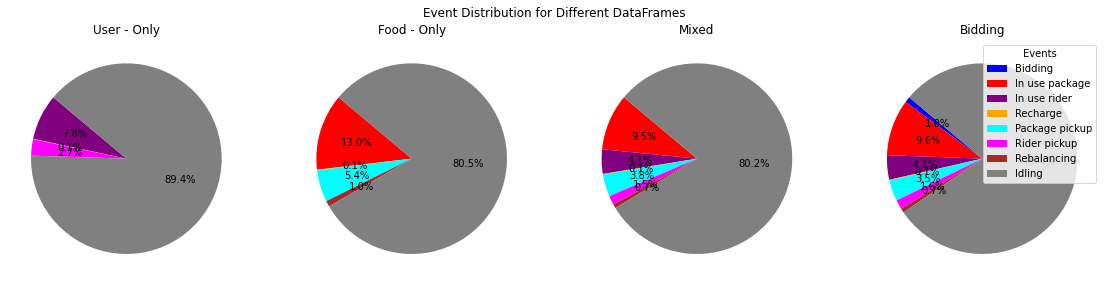

In [132]:

# Create a list of DataFrames
data_frames = [time_u, time_f, time, time_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Define a color map to ensure consistent colors for the same row names
color_map = {
    'Bidding': 'blue',
    'In use package': 'red',
    'In use rider': 'purple',
    'Recharge': 'orange',
    'Package pickup': 'cyan',
    'Rider pickup': 'magenta',
    'Rebalancing': 'brown',
    'Idling': 'gray',
}

# Create subplots for pie charts
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor='white')  # Set facecolor to white

for i, ax in enumerate(axes):
    df = data_frames[i]

    # Filter out rows with Percentage > 0 (optional, to exclude zero percentage values)
    df = df[df['Time Percentage'] > 0]

    # Get unique row names and corresponding colors
    unique_rows = df['New Column Name'].unique()
    colors = [color_map.get(row, 'gray') for row in unique_rows]

    # Create the pie chart with improved settings
    wedges, texts, autotexts = ax.pie(
        df['Time Percentage'],
        labels=None,  # Remove labels from the pie
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,  # Use the assigned colors from the color map
    )

    # Add a title for each subplot
    ax.set_title(titles[i])

# Add a common title for all subplots
fig.suptitle('Event Distribution for Different DataFrames')

# Add a legend to the last subplot
axes[-1].legend(wedges, unique_rows, title="Events")

# Display the subplots
plt.tight_layout()
plt.show()

